In [1]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
def drawitall(myarray):
    x = list()
    y = list()

    height = myarray.shape[0]
    width = myarray.shape[1]

    for h in range(height):
        for w in range(width):
            if (myarray[h,w] > 0):
                x.append(w)
                y.append(height-h)
    
    plt.plot(x,y,'ro')
    plt.axis([-1, width+1, -1, height+1]) 
    clear_output(True)   
    plt.show()

In [3]:
plt.rcParams['figure.figsize'] = [5,5]
grid = np.zeros( (30, 30), dtype=int)
snake = [[15,7],[15,8],[15,9],[15,10],[15,11]]
sn_head = [15,7]
facing = 'W'

In [4]:
def update(grid,snake):
    for i in range (len(snake)):
        grid[snake[i][0],snake[i][1]] = 1
    drawitall(grid)
    time.sleep(0.5)

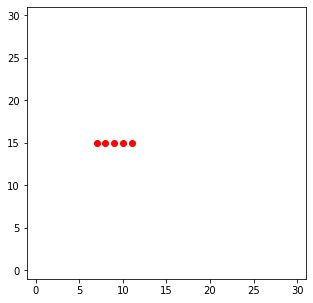

In [5]:
update(grid,snake)

In [6]:
def adjust(grid,snake,sn_head):
    snake.insert(0,[sn_head[0],sn_head[1]])
    grid[snake[len(snake)-1]] = 0
    snake.pop(len(snake)-1)

In [7]:
def vertical(grid,snake,sn_head,facing):
    if facing == 'N':
        sn_head[0] = len(grid)-1
    elif facing == 'S':
        sn_head[0] = 0
    for i in range (len(snake)):
        adjust(grid,snake,sn_head)
        update(grid,snake)
        if facing == 'N':
            sn_head[0] = sn_head[0]-1
        elif facing == 'S':
            sn_head[0] = sn_head[0]+1

In [8]:
def horizontal(grid,snake,sn_head,facing):
    if facing == 'W':
        sn_head[1] = len(grid)-1
    elif facing == 'E':
        sn_head[1] = 0
    for i in range (len(snake)):
        adjust(grid,snake,sn_head)
        update(grid,snake)
        if facing == 'W':
            sn_head[1] = sn_head[1]-1
        elif facing == 'E':
            sn_head[1] = sn_head[1]+1

In [9]:
def check_borders(grid,snake,sn_head,facing):
    if (sn_head[1]+1) >= len(grid): 
        return 'F'
    elif (sn_head[1]-1) < 0:
        return 'F'
    elif ((sn_head[0]+1) >= len(grid)) or ((sn_head[0]-1) < 0):
        return 'V'
    return 'T'

In [10]:
def move_forward(grid,snake,facing):
    boo = True
    boo2 = True
    if check_borders(grid,snake,sn_head,facing) == 'V':
        boo = False
        vertical(grid,snake,sn_head,facing)
    elif check_borders(grid,snake,sn_head,facing) == 'F':
        boo2 = False
        horizontal(grid,snake,sn_head,facing)
    if facing == 'E' and boo2:
        sn_head[1] = sn_head[1]+1
    elif facing == 'S' and boo:
        sn_head[0] = sn_head[0]+1
    elif facing == 'N' and boo:
        sn_head[0] = sn_head[0]-1
    elif facing == 'W' and boo2:
        sn_head[1] = sn_head[1]-1
    adjust(grid,snake,sn_head)
    update(grid,snake)

In [11]:
def r_or_l():
    num = random.random()
    direction = ''
    if num < 0.5:
        direction = 'R'
    else:
        direction = 'L'
    return direction

In [12]:
def direction():
    direction = ''
    if round(random.random(),1) < 0.5:
        direction = 'F'
    else:
        direction = r_or_l()
    return direction

In [13]:
def turn_if_EW(grid,snake,sn_head,facing,direction):
    if (facing == 'E' and direction == 'L') or (facing == 'W' and direction == 'R'):
        facing = 'N'
    elif (facing == 'E' and direction == 'R') or (facing == 'W' and direction == 'L'):
        facing = 'S'
    return facing

In [14]:
def turn_if_NS(grid,snake,sn_head,facing,direction):
    if (facing == 'N' and direction == 'R') or (facing == 'S' and direction == 'L'):
        facing = 'E'
    elif (facing == 'N' and direction == 'L') or (facing == 'S' and direction == 'R'):
        facing = 'W'
    return facing

In [15]:
def EW_or_NS(facing):
    boo = True
    if (facing == 'E') or (facing == 'W'):
        boo = True
    elif (facing == 'N') or (facing == 'S'):
        boo = False
    return boo

In [16]:
def turn(grid,snake,sn_head,facing,direction):
    if EW_or_NS(facing) and (check_borders(grid,snake,sn_head,facing) == 'T'):
        facing = turn_if_EW(grid,snake,sn_head,facing,direction)
    elif (EW_or_NS(facing)) == False and (check_borders(grid,snake,sn_head,facing) == 'T'):
        facing = turn_if_NS(grid,snake,sn_head,facing,direction)
    for i in range (len(snake)):
        move_forward(grid,snake,facing)
    return facing

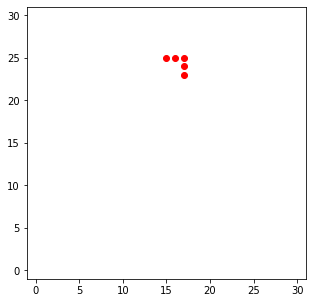

KeyboardInterrupt: 

In [17]:
while True:
    if direction() == 'F':
        move_forward(grid,snake,facing)
    elif direction() == 'R':
        facing = turn(grid,snake,sn_head,facing,'R')
    elif direction() == 'L':
        facing = turn(grid,snake,sn_head,facing,'L')